In [1]:
import os

In [3]:
base_dir = 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [6]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [17]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

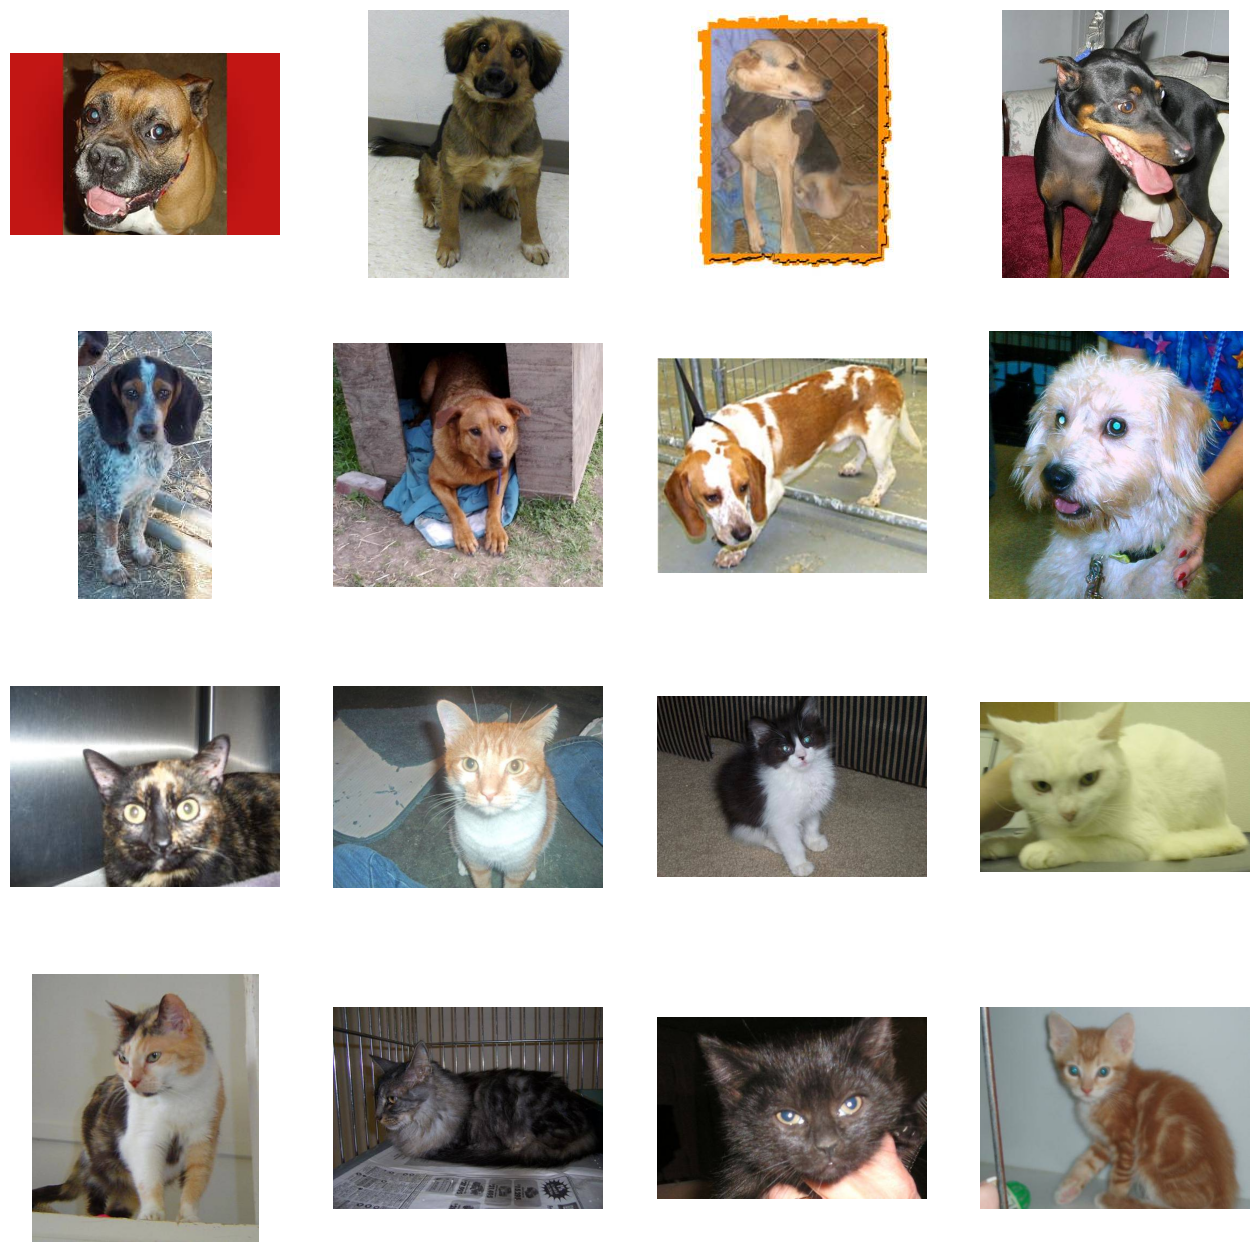

In [22]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_dog_pix + next_cat_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [58]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), # Flatten the results to feed into a DNN
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [59]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [62]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
100/100 - 11s - 105ms/step - accuracy: 0.5385 - loss: 0.7185 - val_accuracy: 0.6340 - val_loss: 0.6678
Epoch 2/15
100/100 - 10s - 100ms/step - accuracy: 0.6280 - loss: 0.6412 - val_accuracy: 0.6700 - val_loss: 0.6090
Epoch 3/15
100/100 - 11s - 110ms/step - accuracy: 0.7075 - loss: 0.5823 - val_accuracy: 0.6960 - val_loss: 0.5733
Epoch 4/15
100/100 - 10s - 100ms/step - accuracy: 0.7285 - loss: 0.5379 - val_accuracy: 0.6450 - val_loss: 0.6814
Epoch 5/15
100/100 - 11s - 108ms/step - accuracy: 0.7640 - loss: 0.4900 - val_accuracy: 0.7130 - val_loss: 0.5521
Epoch 6/15
100/100 - 10s - 103ms/step - accuracy: 0.8055 - loss: 0.4279 - val_accuracy: 0.7280 - val_loss: 0.5870
Epoch 7/15
100/100 - 10s - 101ms/step - accuracy: 0.8325 - loss: 0.3779 - val_accuracy: 0.7150 - val_loss: 0.5875
Epoch 8/15
100/100 - 10s - 99ms/step - accuracy: 0.8655 - loss: 0.3018 - val_accuracy: 0.7100 - val_loss: 0.6478
Epoch 9/15
100/100 - 10s - 100ms/step - accuracy: 0.8945 - loss: 0.2474 - val_accuracy: 0

In [63]:
import numpy as np

from tensorflow.keras.utils import load_img, img_to_array

test_folder_path = "C:\\Users\\Mohammad\\Desktop\\CNN practice\\test_folder\\"
test_folder = os.listdir(test_folder_path) 


for fn in test_folder:
 
  # predicting images
  path= test_folder_path + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=2)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[0.06322982]
cat.1.jpg is a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.8694966]
cat.2.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.01796559]
cat.2027.jpg is a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.11168619]
cat.2028.jpg is a cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[1.]
dog.1.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[0.99675804]
dog.2010.jpg is a dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.8974777]
dog.2030.jpg is a dog


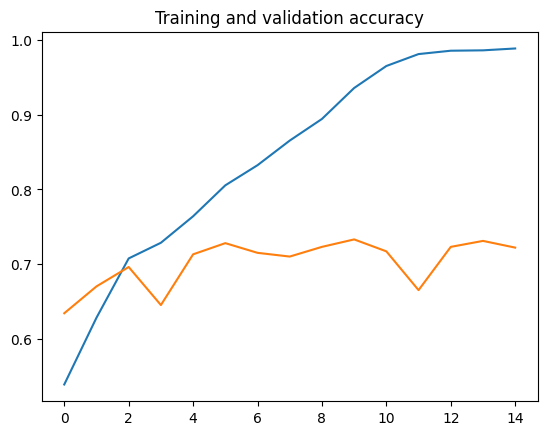

In [64]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.show()



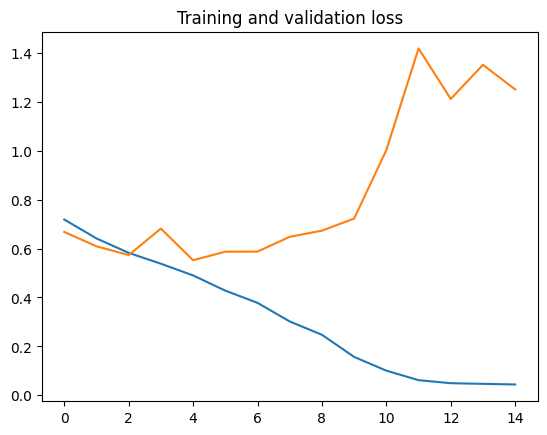

In [65]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
plt.show()

# Visualizing Intermediate Representations ???
To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the model.

You can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [73]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

NameError: name 'visualization_model' is not defined

In [74]:
cat_img_files

['C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.0.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.1.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.10.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.100.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.101.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.102.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.103.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.104.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.105.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.106.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN practice\\cats_and_dogs\\train\\cats\\cat.107.jpg',
 'C:\\Users\\Mohammad\\Desktop\\CNN p